In [1]:
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from scipy.fftpack import fft, fftshift
from scipy.signal import argrelmax

# Ventana Blackman-Harris Generalizada
$$w_{rz}[n]=1,\quad \left|n\right| \le \frac{M-1}{2}$$
$$w_{bz}[n]= w_{rz}[n] \sum_{k=0}^{L-1} \alpha_k \cos(k\omega_M n)$$
$$W_{bz}(\omega)= \sum_{k=-(L-1)}^{L-1}\alpha_k W_{rz}(\omega+k\omega_M),\quad\omega_M=\frac{2\pi}{M}$$
* Centrada en el origen (zero-phase)
* Longitud M (impar)
* L = 1, rectangular
* L = 2, familia Hamming generalizada
* L = 3, familia Blackman

## Ventana de Blackman
* $L=3,\alpha_0=0.42,\alpha_1=0.5,\alpha_2=0.08$

$$w_{bz}[n]= w_{rz}[n] \left[ 0.42 + 0.5 \cos(\omega_M n) + 0.08 \cos(2\omega_M n)\right],\,|n| \le (M-1)/2$$

<function __main__.blackmanplot>

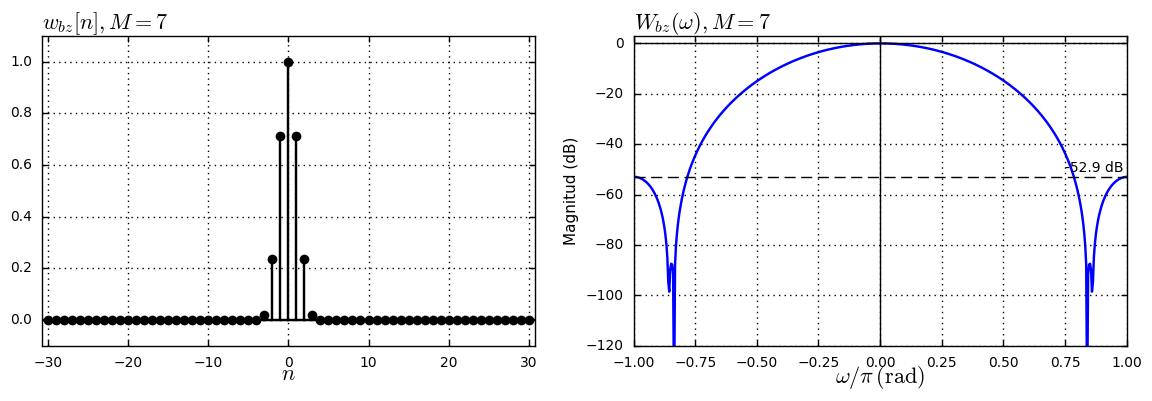

In [2]:
def blackmanplot(M=7):
    N = 30
    pad = int((2*N+1-M)/2)
    n = np.r_[-N:N+1:1]
    alpha = [0.42, 0.5, 0.08]
    Mo2 = int((M-1)/2)
    wb = alpha[0] + alpha[1]*np.cos(2*np.pi*(np.r_[-Mo2:Mo2+1:1]/M)) + \
         alpha[2]*np.cos(4*np.pi*(np.r_[-Mo2:Mo2+1:1]/M))
    x = np.r_[[0]*pad, wb, [0]*pad]
    Nfft = 512
    Wb = fftshift(fft(x, Nfft))
    Wb /= np.max(Wb)
    aWb = np.abs(Wb)
    mWb = 20*np.log10(aWb)
    o = np.linspace(-1, 1, Nfft)
    plt.subplots(1, 2, figsize=(14, 4))
    plt.subplot(121)
    offx = 0.75
    lines = plt.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')
    lines[2].set_xdata([n[0]-1, n[-1]+1])
    plt.axis([-N-offx, N+offx, -0.1, 1.1])
    plt.grid(True)
    plt.xlabel(r'$n$', fontsize=16, labelpad=-4)
    plt.title(r'$w_{bz}[n], M=' + '{0}'.format(M) + r'$', fontsize=16, loc='left')
    plt.subplot(122)
    plt.plot(o, mWb)
    plt.axis([-1, 1, -120, 3])
    plt.xticks(np.r_[-1:1.25:0.25])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)

    maxidx = argrelmax(np.abs(aWb), mode='wrap')
    maxWb = aWb[maxidx]
    maxWb[np.argmax(maxWb)] = 0
    at1 = 20*np.log10(np.max(maxWb))
    plt.axhline(at1, color='k', linewidth=1, dashes=(8,4))
    plt.text(0.75, at1 + 2, '{0:.1f} dB'.format(at1))

    plt.grid(True)
    plt.title(r'$W_{bz}(\omega), M=' + '{0}'.format(M) + r'$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Magnitud (dB)')
interact(blackmanplot, M=(7, 59, 2))

## Ventana de Blackman-Harris
* $L=3, \alpha_0 = 0.4243801,\alpha_1 = 0.4973406, \alpha_2 = 0.0782793$

$$w_{bz}[n]= w_{rz}[n] \left[ 0.4243801 + 0.4973406 \cos(\omega_M n) + 0.0782793 \cos(2\omega_M n)\right], 
\,|n| \le (M-1)/2$$

<function __main__.blackmanharrisplot>

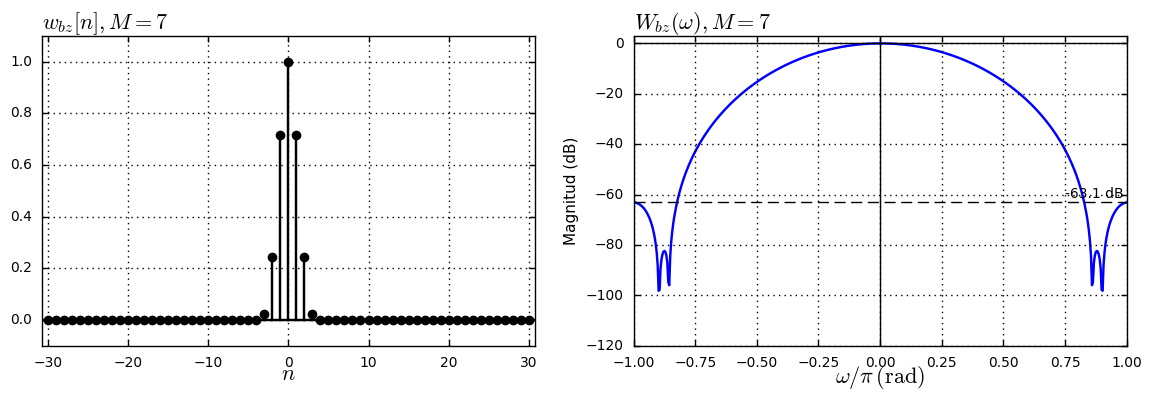

In [3]:
def blackmanharrisplot(M=7):
    N = 30
    pad = int((2*N+1-M)/2)
    n = np.r_[-N:N+1:1]
    Mo2 = int((M-1)/2)
    alpha = [0.4243801, 0.4973406, 0.0782793]
    wb = alpha[0] + alpha[1]*np.cos(2*np.pi*(np.r_[-Mo2:Mo2+1:1]/M)) + \
         alpha[2]*np.cos(4*np.pi*(np.r_[-Mo2:Mo2+1:1]/M))
    x = np.r_[[0]*pad, wb, [0]*pad]
    Nfft = 512
    Wb = fftshift(fft(x, Nfft))
    Wb /= np.max(Wb)
    aWb = np.abs(Wb)
    mWb = 20*np.log10(aWb)
    o = np.linspace(-1, 1, Nfft)
    plt.subplots(1, 2, figsize=(14, 4))
    plt.subplot(121)
    offx = 0.75
    lines = plt.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')
    lines[2].set_xdata([n[0]-1, n[-1]+1])
    plt.axis([-N-offx, N+offx, -0.1, 1.1])
    plt.grid(True)
    plt.xlabel(r'$n$', fontsize=16, labelpad=-4)
    plt.title(r'$w_{bz}[n], M=' + '{0}'.format(M) + r'$', fontsize=16, loc='left')
    plt.subplot(122)
    plt.plot(o, mWb)
    plt.axis([-1, 1, -120, 3])
    plt.xticks(np.r_[-1:1.25:0.25])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)

    maxidx = argrelmax(np.abs(aWb), mode='wrap')
    maxWb = aWb[maxidx]
    maxWb[np.argmax(maxWb)] = 0
    at1 = 20*np.log10(np.max(maxWb))
    plt.axhline(at1, color='k', linewidth=1, dashes=(8,4))
    plt.text(0.75, at1 + 2, '{0:.1f} dB'.format(at1))

    plt.grid(True)
    plt.title(r'$W_{bz}(\omega), M=' + '{0}'.format(M) + r'$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Magnitud (dB)')
interact(blackmanharrisplot, M=(7, 59, 2))